In [361]:
### Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from  sklearn.model_selection import train_test_split , StratifiedKFold

import warnings 
warnings.simplefilter('ignore')

In [362]:
## Read Data files 
train = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\train_v9rqX0R.csv')
test = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\test_AbJTz2l.csv')
submission = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\sample_submission_8RXa3c6.csv')

In [363]:
#### Get Basic Details of the data files
print('Train data Shape : ' , train.shape)
print('Test data Shape : ' , test.shape)
print('Submission data Shape : ' , submission.shape)

print('#########################################')
print('Null Data Details - Train data')
print(train.isnull().sum())

print('#########################################')
print('Null Data Details - Test data')
print(test.isnull().sum())

Train data Shape :  (8523, 12)
Test data Shape :  (5681, 11)
Submission data Shape :  (5681, 3)
#########################################
Null Data Details - Train data
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64
#########################################
Null Data Details - Test data
Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            

##### Observation -- >
Both Train & test data has Null values for Item_Weight & Outlet_Size which needs to be fixed.

##### Data Analysis -- >
Lets check the different type of data available in dataset

In [364]:
print('Train Data Set -- >')
print(train.info())
print('######################################')
print('Test Dataset ====> ')
print(test.info())

Train Data Set -- >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
####################

In [365]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [366]:
### Find Numerical and Categorical features
numerical = [features for features in train.columns if train[features].dtypes != 'O'] 

categorical = [features for features in train.columns if train[features].dtypes == 'O']

print('Numerical Features are : ')
print(numerical)
print('Categorical Features are : ')
print(categorical)

Numerical Features are : 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Categorical Features are : 
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


###### Observation -- >
from Data and details provided in problem statement , below needs to be applied
1. Outlet_Establishment_Year is of Int data type but actual data is Year. We can treat it as datatime variable. So remove it from numerical list
2. Item_Outlet_Sales is target variable . So we may wnat to use if in different manner
3. As the name suggest , Item_Identifier & Outlet_Identifier are identifiers for which prediction needs to be applied. Also these 2 fetures are mixed variables containing numerical and string combition. Remove from Categorical list.

In [367]:
numerical.remove('Outlet_Establishment_Year')

categorical = [f for f in categorical if f not in ('Item_Identifier' , 'Outlet_Identifier')]

print('Numerical Features are : ')
print(numerical)
print('Categorical Features are : ')
print(categorical)
print('Datetime features are :')
print('Outlet_Establishment_Year')
print('Mixed variables are : ')
print('Item_Identifier & Outlet_Identifier')

Numerical Features are : 
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
Categorical Features are : 
['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
Datetime features are :
Outlet_Establishment_Year
Mixed variables are : 
Item_Identifier & Outlet_Identifier


#### Data Analysis on Numerical Data 
1. Contineous numerical data 
2. Descrete numerical data

In [368]:
## Lets inspect values of variable 
for i in numerical :
    print(i)
    print(train[i].dropna().unique())
    print('######################')

Item_Weight
[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65  16.2   11.8   18.5
 15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.     7.645
 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8   13.6
 21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895  7.905
  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855  7.825
  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305 20.85
 20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5    6.635
 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25   8.6
 12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6   14.
 16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2   14.5
 13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78  11.85
 18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2    6.32
  4.88   5.425 14.1    7.55  17.25  12.    10.1    7.785 13.15   8.5
  7.63   9.285  7.975 15.7    8.985 20.35   6.59  19.85   6.26  18.2
  8.695  7.0

#### Observation -->
1. All numerical variables are contineous and there is no descrete data present 
2. Data also does not contain binary variables . containing 2 distinct values 

In [369]:
print(train[numerical].describe())

       Item_Weight  Item_Visibility     Item_MRP  Item_Outlet_Sales
count  7060.000000      8523.000000  8523.000000        8523.000000
mean     12.857645         0.066132   140.992782        2181.288914
std       4.643456         0.051598    62.275067        1706.499616
min       4.555000         0.000000    31.290000          33.290000
25%       8.773750         0.026989    93.826500         834.247400
50%      12.600000         0.053931   143.012800        1794.331000
75%      16.850000         0.094585   185.643700        3101.296400
max      21.350000         0.328391   266.888400       13086.964800


#### Observation -- >
1. Item_Visibility has 0 minimum values . This is not real so such data needs to be fixed along with Null data fixes.

In [370]:
### Visualize the numerical data 
def NumHist(df,feature):
    plt.hist(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count of" + feature)
    plt.title(feature)
    plt.show()

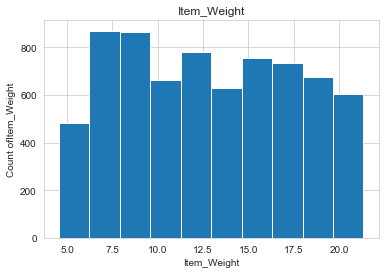

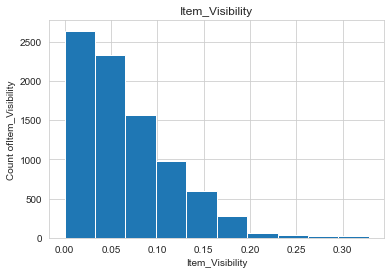

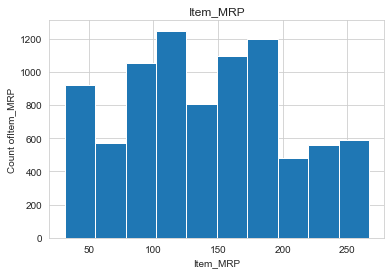

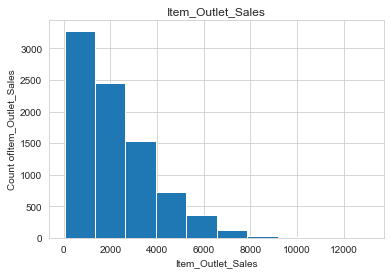

In [371]:
for i in numerical:
    NumHist(train,i)

##### Observations on train data -- >
1. Item_Visibility & Item_Outlet_Sales are right skewed. These features also has outliers which needs to be corrected.
2. For Item_Visibility & Item_Outlet_Sales --> median & IQR will be more sesible use for measure of central tendancy as these are skewed. For rest mean & Std Deviation is more sensible.

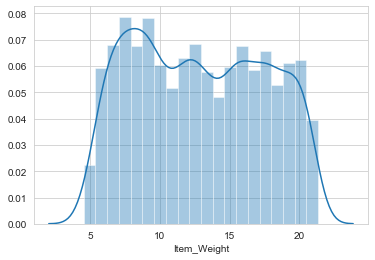

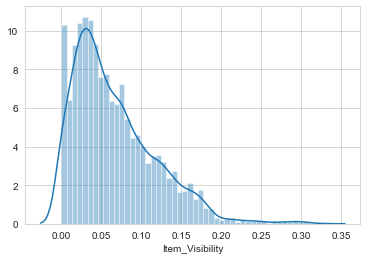

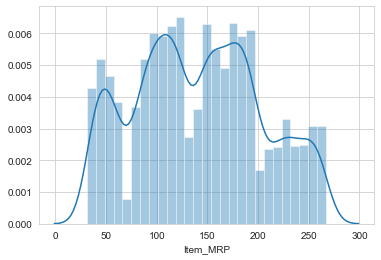

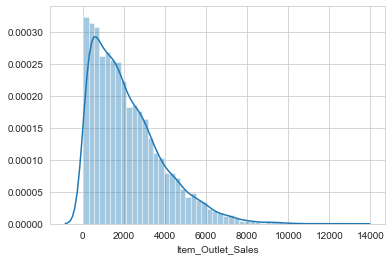

In [372]:
for i in numerical :
    sns.distplot(train[i])
    plt.show()

##### Observation -- >
1. Item_Visibility & Item_Outlet_Sales Features doesnt follow normal distribution so needs to be transformed.
2. Rest 2 can be kept as is .

#### Data Fixes & Transformation to Numerical features based on above analysis.
1. Null value population for Item_Weight 
2. Item_Visibility population for records with 0 value
3. Normalization of Item_Outlet_Sales & Item_Visibility 

###### Item_Weight Null values population -- >

In [373]:
train[train.Item_Weight.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


####### Item Weight can be different based on different items. In dataset we have mixed variable Item_Identifier which may be useful distinguish different items 

In [374]:
## New feature addition 
train['Item_Type_Reduced'] = train['Item_Identifier'].str[:2]
train[train.Item_Weight.isnull()].Item_Type_Reduced.value_counts()

FD    1066
NC     273
DR     124
Name: Item_Type_Reduced, dtype: int64

In [375]:
train.groupby('Item_Type_Reduced')['Item_Weight'].median()

Item_Type_Reduced
DR    11.8
FD    12.6
NC    13.0
Name: Item_Weight, dtype: float64

In [376]:
train.groupby('Item_Type_Reduced')['Item_Weight'].mean()

Item_Type_Reduced
DR    12.072348
FD    12.832186
NC    13.354532
Name: Item_Weight, dtype: float64

##### Based on descriptive statistics and dencity plot, it is visible that Item_Weight distribution is not very much skewed so instead of median lets populate mean.

In [377]:
condition = train.Item_Weight.isnull()

WeightMap=dict(train.groupby(['Item_Type_Reduced'])['Item_Weight'].mean())
train.loc[condition,'Item_Weight']=train.loc[condition,'Item_Type_Reduced'].apply(lambda x :WeightMap[x] )
print(train.Item_Weight.isnull().sum())

0


In [378]:
## New feature addition to test data 
test['Item_Type_Reduced'] = test['Item_Identifier'].str[:2]

### Item_Weight population 
condition = test.Item_Weight.isnull()

WeightMap=dict(test.groupby(['Item_Type_Reduced'])['Item_Weight'].mean())
test.loc[condition,'Item_Weight']=test.loc[condition,'Item_Type_Reduced'].apply(lambda x :WeightMap[x] )
print(test.Item_Weight.isnull().sum())

0


#### Item_Visibility population for records with 0 value 

In [379]:
train[train.Item_Visibility == 0 ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Reduced
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,FD
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,FD
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064,FD


In [380]:
train[train.Item_Visibility == 0 ].Item_Type_Reduced.value_counts()

FD    366
NC     94
DR     66
Name: Item_Type_Reduced, dtype: int64

In [381]:
train.groupby('Item_Type_Reduced')['Item_Visibility'].median()

Item_Type_Reduced
DR    0.049179
FD    0.056406
NC    0.044999
Name: Item_Visibility, dtype: float64

In [382]:
##### Based on descriptive statistics and dencity plot, it is visible that Item_Visibility distribution is right skewed so instead of mean lets populate median.

In [383]:
condition = train.Item_Visibility == 0

VisibilityMap=dict(train.groupby(['Item_Type_Reduced'])['Item_Visibility'].median())
train.loc[condition,'Item_Visibility']=train.loc[condition,'Item_Type_Reduced'].apply(lambda x :VisibilityMap[x] )

train[train.Item_Visibility == 0 ].Item_Type_Reduced.value_counts()

Series([], Name: Item_Type_Reduced, dtype: int64)

In [384]:
train[train.Item_Visibility == 0 ].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Reduced


In [385]:
### Test data population
condition = test.Item_Visibility == 0

VisibilityMap=dict(test.groupby(['Item_Type_Reduced'])['Item_Visibility'].median())
test.loc[condition,'Item_Visibility']=test.loc[condition,'Item_Type_Reduced'].apply(lambda x :VisibilityMap[x] )

###### Nomalization of Item_Outlet_Sales and Item_Visibility -- >
Gaussian Transformation

###### Plots to assess Normality

To visualise the distribution of the variables, we plot a histogram and a Q-Q plot. In the Q-Q pLots, if the variable is normally distributed, the values of the variable should fall in a 45 degree line when plotted against the theoretical quantiles. 

In [386]:
### Import new library 
import scipy.stats as stats

In [387]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

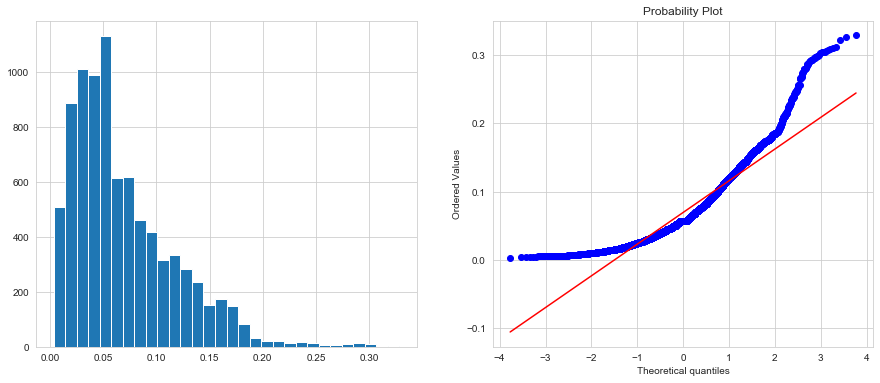

In [388]:
diagnostic_plots(train , 'Item_Visibility')

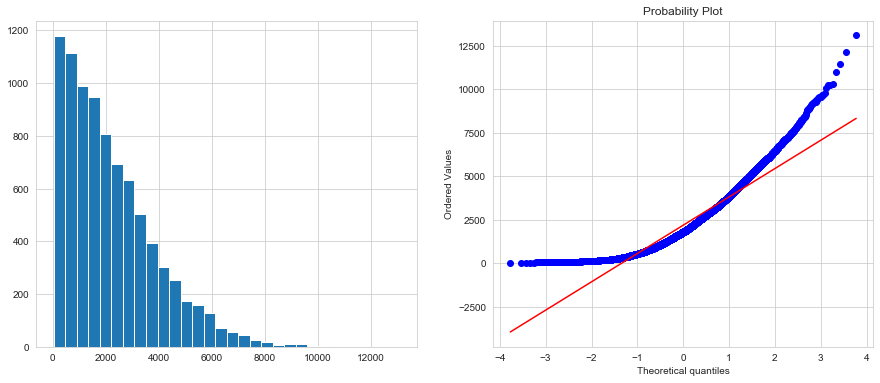

In [389]:
diagnostic_plots(train , 'Item_Outlet_Sales')

#### Lets Transform data 

##### 1.  Logarithmic Transformation 

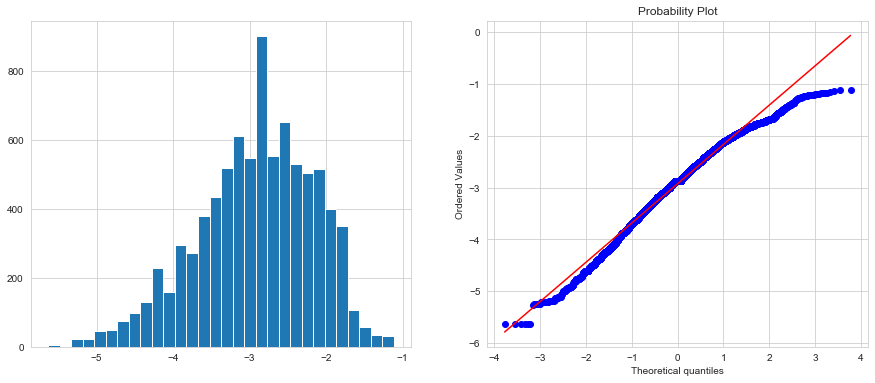

In [390]:
train['Item_Visibility_Log'] =  np.log(train['Item_Visibility'])
test['Item_Visibility_Log'] =  np.log(test['Item_Visibility'])
diagnostic_plots(train , 'Item_Visibility_Log')

#### Log Transformation

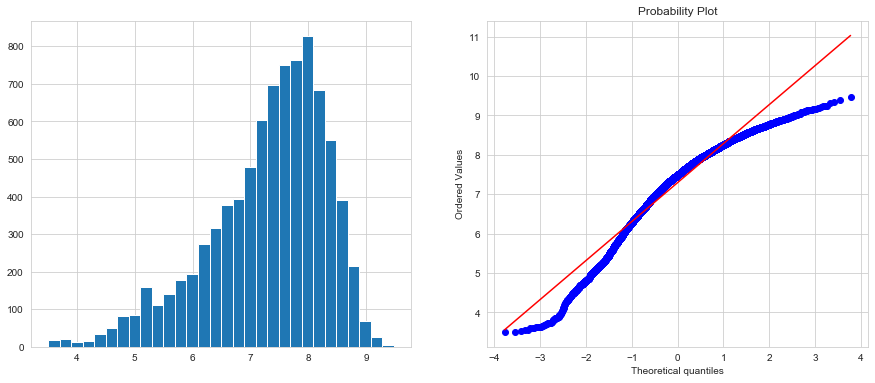

In [391]:
train['Item_Outlet_Sales_log'] = np.log(train['Item_Outlet_Sales'])
diagnostic_plots(train , 'Item_Outlet_Sales_log')

Optimal λ:  0.22143103262313046


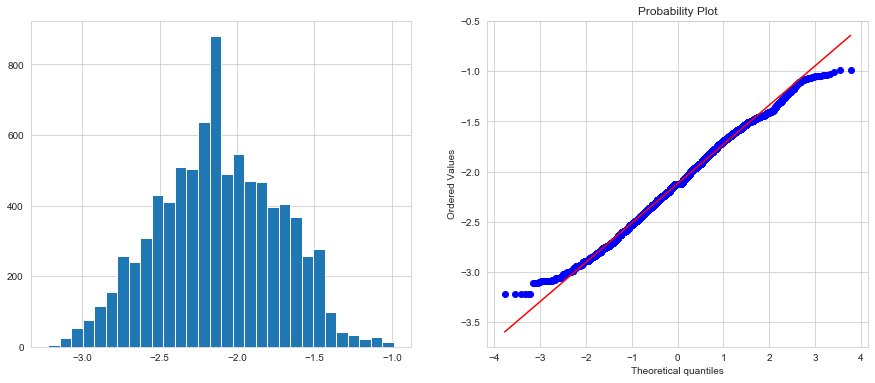

In [392]:
train['Item_Visibility_BoxCox'], param = stats.boxcox(train['Item_Visibility']) 

print('Optimal λ: ', param)

diagnostic_plots(train, 'Item_Visibility_BoxCox')

Optimal λ:  0.22274918982084851


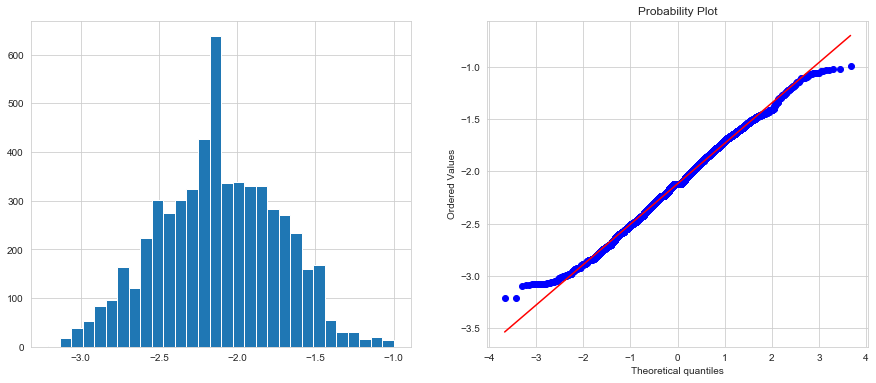

In [393]:
test['Item_Visibility_BoxCox'], param = stats.boxcox(test['Item_Visibility']) 

print('Optimal λ: ', param)

diagnostic_plots(test, 'Item_Visibility_BoxCox')

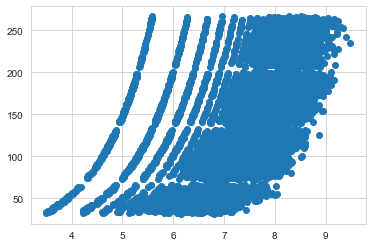

In [394]:
plt.scatter(train.Item_Outlet_Sales_log , train.Item_MRP)
plt.show()

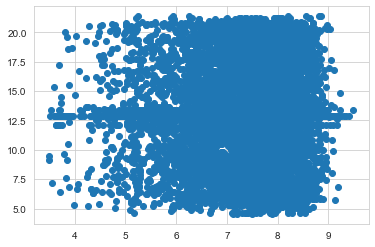

In [395]:
plt.scatter(train.Item_Outlet_Sales_log , train.Item_Weight)
plt.show()

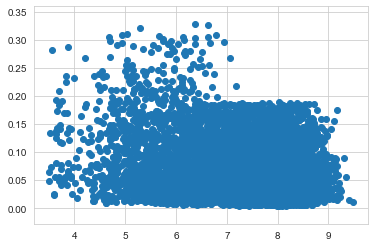

In [396]:
plt.scatter(train.Item_Outlet_Sales_log , train.Item_Visibility)
plt.show()

In [397]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Reduced,Item_Visibility_Log,Item_Outlet_Sales_log,Item_Visibility_BoxCox
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,-4.132215,8.225540,-2.707315
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,-3.948780,6.094524,-2.632334
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,-4.088756,7.648392,-2.689825
3,FDX07,19.20,Regular,0.056406,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,-2.875177,6.596300,-2.126802
4,NCD19,8.93,Low Fat,0.044999,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,-3.101104,6.902446,-2.243391


###### Create New Numerical Features 

In [398]:
### Create new features 
train['Item_Weight_div_Item_Visibility'] = train['Item_Weight']/train['Item_Visibility']

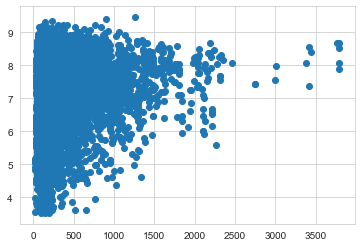

In [399]:
plt.scatter(train['Item_Weight_div_Item_Visibility'] , train.Item_Outlet_Sales_log )
plt.show()

In [400]:
train['Item_MRP_div_Item_Weight'] = train['Item_MRP']/train['Item_Weight']

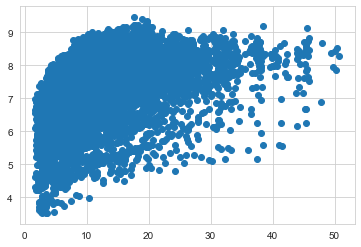

In [401]:
plt.scatter(train['Item_MRP_div_Item_Weight'], train.Item_Outlet_Sales_log )
plt.show()

In [402]:
train['Vis_div_Weight_dev_MRP'] = train['Item_Visibility']/(train['Item_Weight']/train['Item_MRP'] )

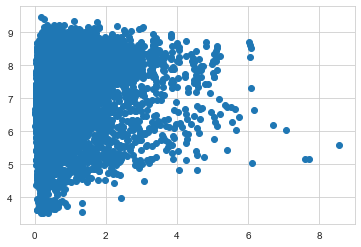

In [403]:
plt.scatter(train['Vis_div_Weight_dev_MRP'] , train.Item_Outlet_Sales_log )
plt.show()

#### Create similar new features in test data

In [404]:
test['Item_Weight_div_Item_Visibility'] = test['Item_Weight']/test['Item_Visibility']
test['Item_MRP_div_Item_Weight'] = test['Item_MRP']/test['Item_Weight']
test['Vis_div_Weight_dev_MRP'] = test['Item_Visibility']/(test['Item_Weight']/test['Item_MRP'] )

In [405]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Type_Reduced',
       'Item_Visibility_Log', 'Item_Outlet_Sales_log',
       'Item_Visibility_BoxCox', 'Item_Weight_div_Item_Visibility',
       'Item_MRP_div_Item_Weight', 'Vis_div_Weight_dev_MRP'],
      dtype='object')

In [406]:
num = ['Item_MRP','Item_Visibility_BoxCox', 'Item_Weight_div_Item_Visibility',
       'Item_MRP_div_Item_Weight', 'Vis_div_Weight_dev_MRP']

In [407]:
train[num].head()

,Item_MRP,Item_Visibility_BoxCox,Item_Weight_div_Item_Visibility,Item_MRP_div_Item_Weight,Vis_div_Weight_dev_MRP
0,249.8092,-2.707315,579.536708,26.861204,0.431050
1,48.2692,-2.632334,307.082357,8.153581,0.157186
2,141.6180,-2.689825,1044.148072,8.092457,0.135630
3,182.0950,-2.126802,340.388542,9.484115,0.534962
4,53.8614,-2.243391,198.446738,6.031512,0.271415


In [408]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train[['Item_MRP' , 'Item_Weight_div_Item_Visibility' , 'Item_MRP_div_Item_Weight']])
train[['Item_MRP' , 'Item_Weight_div_Item_Visibility' , 'Item_MRP_div_Item_Weight']] = scaler.transform(train[['Item_MRP' , 'Item_Weight_div_Item_Visibility' , 'Item_MRP_div_Item_Weight']])

In [409]:
train[num].head()

,Item_MRP,Item_Visibility_BoxCox,Item_Weight_div_Item_Visibility,Item_MRP_div_Item_Weight,Vis_div_Weight_dev_MRP
0,0.927507,-2.707315,0.147812,0.512840,0.431050
1,0.072068,-2.632334,0.075601,0.131750,0.157186
2,0.468288,-2.689825,0.270954,0.130505,0.135630
3,0.640093,-2.126802,0.084428,0.158854,0.534962
4,0.095805,-2.243391,0.046808,0.088522,0.271415


In [410]:
## Scale test data as well
scaler = MinMaxScaler()
scaler.fit(test[['Item_MRP' , 'Item_Weight_div_Item_Visibility' , 'Item_MRP_div_Item_Weight']])
test[['Item_MRP' , 'Item_Weight_div_Item_Visibility' , 'Item_MRP_div_Item_Weight']] = scaler.transform(test[['Item_MRP' , 'Item_Weight_div_Item_Visibility' , 'Item_MRP_div_Item_Weight']])

### Categorical feature Analysis

In [411]:
categorical

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Lets Find Ordinal and Nominal variables 

In [412]:
def CatBar(data,feature):
    fig = data[feature].value_counts().plot.bar()
    fig.set_title(feature)
    fig.set_ylabel('Number')
    plt.show()

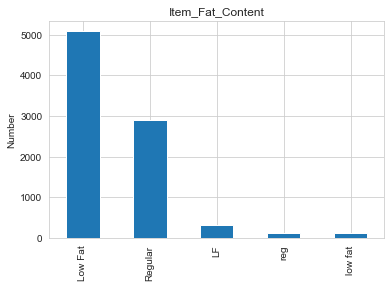

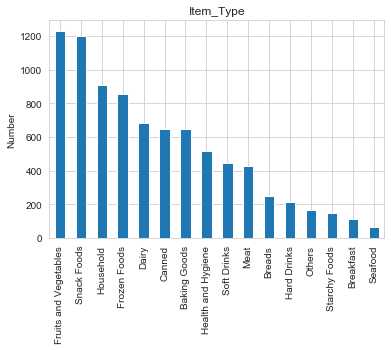

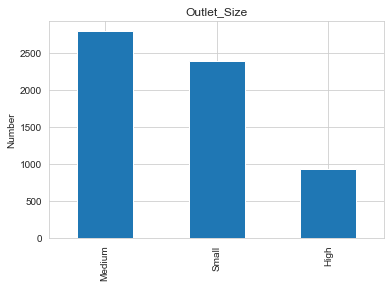

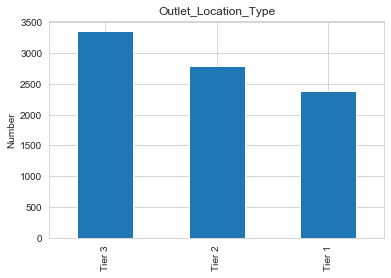

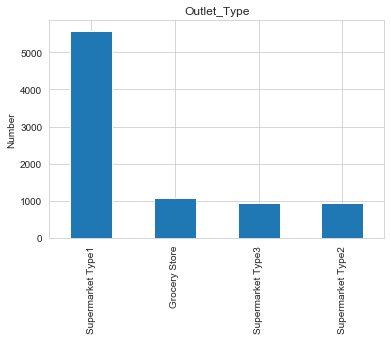

In [413]:
for f in categorical:
    CatBar(train,f)
    

##### Observations -- >
Ordinal features -- >

1. Outlet_Size (Null Value population is expected)
2. Outlet_location_Type
3. Outlet_Type

Nominal features -- >
1. Item_Fat_Content ( This feature actually has only 2 distinct values)
2. Item_Type (This feature has high cardinality)


In [414]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [415]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF': 'Low Fat' , 'low fat' : 'Low Fat' , 'reg' : 'Regular' }) 

In [416]:
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###### Bivariate Analysis

Categorical Vs Categorical

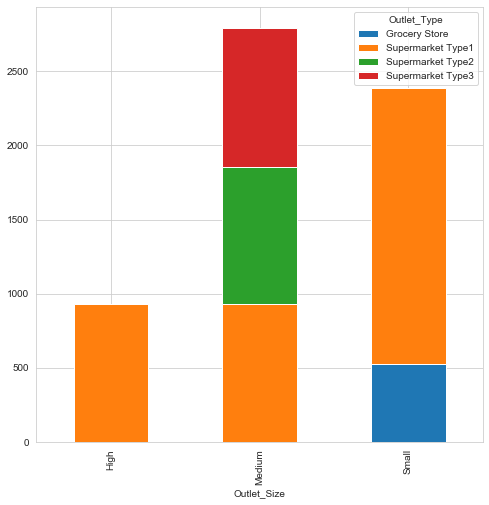

In [417]:
pd.crosstab(index= train['Outlet_Size'] , columns=train['Outlet_Type']).plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

###### Observation -- >
From above , we can see Which Outlet_Types falls under which Outlet_Sizes , we can use this relation to populate Null Outlet_Size

In [418]:
train[train['Outlet_Size'].isna()].Outlet_Type.value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [419]:
test[test['Outlet_Size'].isna()].Outlet_Type.value_counts()

Supermarket Type1    1236
Grocery Store         370
Name: Outlet_Type, dtype: int64

In [420]:
cond=(train['Outlet_Size'].isna())
train.loc[cond & (train['Outlet_Type']=='Grocery Store'),'Outlet_Size']='Small'
train.loc[cond & (train['Outlet_Type']=='Supermarket Type1'),'Outlet_Size']='High'


In [421]:
train.Outlet_Size.value_counts(dropna=False)

Small     2943
Medium    2793
High      2787
Name: Outlet_Size, dtype: int64

Null value for categorical feature is populated with correct data

####### Categorical Vs Numerical

In [422]:
def catBox(data,feature) :
    data.boxplot(column = 'Item_Outlet_Sales_log' , by = feature)
    plt.show()

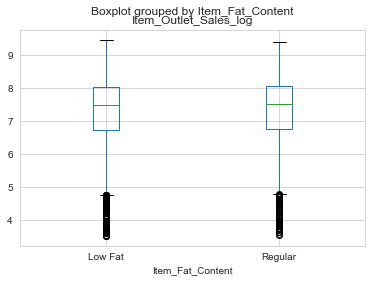

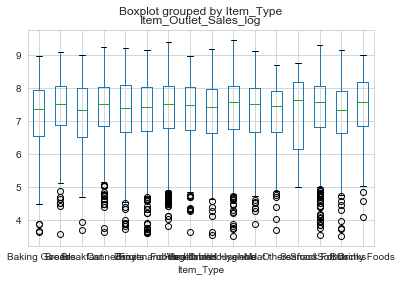

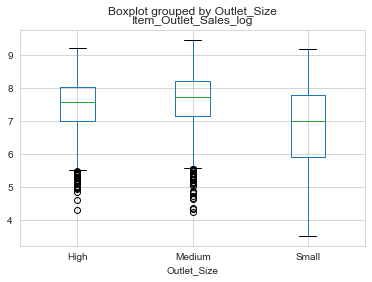

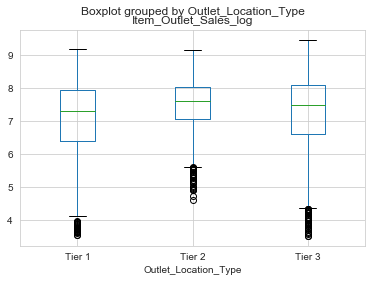

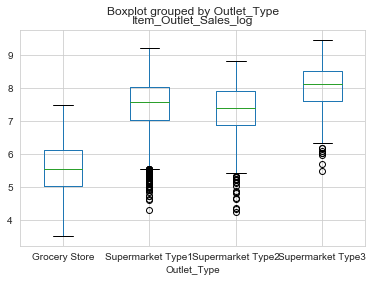

In [423]:
for i in categorical:
    catBox(train, i)

In [424]:
pd.pivot_table(data = train , index = 'Outlet_Location_Type' , columns = 'Item_Type' , values = 'Item_Outlet_Sales_log')

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Location_Type,,,,,,,,,,,,,,,,
Tier 1,7.001812,7.155601,6.797418,7.138686,7.019951,7.070688,7.149540,7.131630,7.035954,7.160563,7.032986,6.847150,6.946538,7.124717,6.932848,7.382298
Tier 2,7.370374,7.499398,7.578526,7.610186,7.527111,7.466229,7.538520,7.504516,7.439761,7.583983,7.541261,7.513890,7.591683,7.545554,7.424233,7.550148
Tier 3,7.154053,7.322736,7.119715,7.280214,7.288310,7.197081,7.322797,7.188463,7.193276,7.268794,7.277464,7.151516,7.219334,7.385092,7.218855,7.246678


In [425]:
pd.pivot_table(data = train , index = 'Item_Type_Reduced' , columns = 'Item_Type' , values = 'Item_Outlet_Sales_log')

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Type_Reduced,,,,,,,,,,,,,,,,
DR,NaN,NaN,NaN,NaN,7.020979,NaN,NaN,7.279395,NaN,NaN,NaN,NaN,NaN,NaN,7.214189,NaN
FD,7.181027,7.337244,7.156498,7.354487,7.350148,7.247892,7.34527,NaN,NaN,NaN,7.284296,NaN,7.266343,7.366242,NaN,7.388342
NC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.230211,7.341583,NaN,7.162161,NaN,NaN,NaN,NaN


In [426]:
train.apply(lambda x : sum(x.isnull()))

Item_Identifier                    0
Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type                          0
Item_MRP                           0
Outlet_Identifier                  0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
Item_Type_Reduced                  0
Item_Visibility_Log                0
Item_Outlet_Sales_log              0
Item_Visibility_BoxCox             0
Item_Weight_div_Item_Visibility    0
Item_MRP_div_Item_Weight           0
Vis_div_Weight_dev_MRP             0
dtype: int64

In [427]:
train['Outlet_Establishment_Year'].max()

2009

In [428]:
train['Years_Old']= 2013- train['Outlet_Establishment_Year']  ## using 2013 as data is collected at 2013
train['Years_Old'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Years_Old, dtype: float64

In [429]:
## Update test data
test['Years_Old']= 2013- test['Outlet_Establishment_Year']  ## using 2013 as data is collected at 2013

In [430]:
train['Item_Type_Reduced'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Type_Reduced, dtype: int64

####### NC items means ' Non consumables . It is not logical to devide it in Item fat content as regular or low fat.
we can create new category for NC

In [431]:
train.loc[train['Item_Type_Reduced'] == 'NC' , 'Item_Fat_Content'] = 'Non Consumable'
train['Item_Fat_Content'].value_counts()

Low Fat           3918
Regular           3006
Non Consumable    1599
Name: Item_Fat_Content, dtype: int64

In [432]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF': 'Low Fat' , 'low fat' : 'Low Fat' , 'reg' : 'Regular' }) 
test.loc[test['Item_Type_Reduced'] == 'NC' , 'Item_Fat_Content'] = 'Non Consumable'
test['Item_Fat_Content'].value_counts()

Low Fat           2581
Regular           2013
Non Consumable    1087
Name: Item_Fat_Content, dtype: int64

In [433]:
train.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Fat_Content                    object
Item_Visibility                    float64
Item_Type                           object
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Outlet_Size                         object
Outlet_Location_Type                object
Outlet_Type                         object
Item_Outlet_Sales                  float64
Item_Type_Reduced                   object
Item_Visibility_Log                float64
Item_Outlet_Sales_log              float64
Item_Visibility_BoxCox             float64
Item_Weight_div_Item_Visibility    float64
Item_MRP_div_Item_Weight           float64
Vis_div_Weight_dev_MRP             float64
Years_Old                            int64
dtype: object

In [434]:
# One hot encoding
train = pd.get_dummies(train , columns = ['Item_Fat_Content' , 'Outlet_Size' , 'Outlet_Location_Type' , 'Outlet_Type'
                                         , 'Item_Type_Reduced'])
train.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_Type                           object
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Visibility_Log                float64
Item_Outlet_Sales_log              float64
Item_Visibility_BoxCox             float64
Item_Weight_div_Item_Visibility    float64
Item_MRP_div_Item_Weight           float64
Vis_div_Weight_dev_MRP             float64
Years_Old                            int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Non Consumable      uint8
Item_Fat_Content_Regular             uint8
Outlet_Size_High                     uint8
Outlet_Size_Medium                   uint8
Outlet_Size_Small                    uint8
Outlet_Location_Type_Tier 1          uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Loca

In [435]:
# One hot encoding
test = pd.get_dummies(test , columns = ['Item_Fat_Content' , 'Outlet_Size' , 'Outlet_Location_Type' , 'Outlet_Type'
                                         , 'Item_Type_Reduced'])
test.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Visibility                    float64
Item_Type                           object
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Item_Visibility_Log                float64
Item_Visibility_BoxCox             float64
Item_Weight_div_Item_Visibility    float64
Item_MRP_div_Item_Weight           float64
Vis_div_Weight_dev_MRP             float64
Years_Old                            int64
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Non Consumable      uint8
Item_Fat_Content_Regular             uint8
Outlet_Size_High                     uint8
Outlet_Size_Medium                   uint8
Outlet_Size_Small                    uint8
Outlet_Location_Type_Tier 1          uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Location_Type_Tier 3          uint8
Outlet_Type_Grocery Store            uint8
Outlet_Type

In [436]:
## Drop columns which are transformed 
train.drop(['Item_Type' , 'Outlet_Establishment_Year' , 'Item_Visibility' , 'Item_Visibility_Log'] , axis = 1 , inplace=True)
test.drop(['Item_Type' , 'Outlet_Establishment_Year' , 'Item_Visibility' , 'Item_Visibility_Log'] , axis = 1 , inplace=True)

In [437]:
train.head()

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Outlet_Sales_log,Item_Visibility_BoxCox,Item_Weight_div_Item_Visibility,Item_MRP_div_Item_Weight,Vis_div_Weight_dev_MRP,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Reduced_DR,Item_Type_Reduced_FD,Item_Type_Reduced_NC
0,FDA15,9.30,0.927507,OUT049,3735.1380,8.225540,-2.707315,0.147812,0.512840,0.431050,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.072068,OUT018,443.4228,6.094524,-2.632334,0.075601,0.131750,0.157186,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.468288,OUT049,2097.2700,7.648392,-2.689825,0.270954,0.130505,0.135630,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.640093,OUT010,732.3800,6.596300,-2.126802,0.084428,0.158854,0.534962,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.095805,OUT013,994.7052,6.902446,-2.243391,0.046808,0.088522,0.271415,...,0,0,1,0,1,0,0,0,0,1


In [438]:
test.head()

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Item_Visibility_BoxCox,Item_Weight_div_Item_Visibility,Item_MRP_div_Item_Weight,Vis_div_Weight_dev_MRP,Years_Old,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Reduced_DR,Item_Type_Reduced_FD,Item_Type_Reduced_NC
0,FDW58,20.750000,0.323413,OUT049,-2.976879,0.724955,0.072034,0.039323,14,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,8.300000,0.235849,OUT017,-2.317081,0.052354,0.180551,0.404277,6,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,14.600000,0.894140,OUT010,-1.803870,0.033890,0.303662,1.648809,15,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,7.315000,0.524488,OUT017,-2.717685,0.121390,0.398176,0.326141,6,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,12.591234,0.862069,OUT027,-1.697219,0.023122,0.345340,2.206258,28,0,...,0,0,1,0,0,0,1,0,1,0


In [439]:
df_train = train.copy()
df_test = test.copy()
df_train.drop(['Item_Outlet_Sales'] , axis = 1 , inplace=True)
#df_test.drop(['Item_Type' , 'Outlet_Establishment_Year'] , axis = 1 , inplace=True)

In [440]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_train[['Item_Weight' , 'Years_Old']])
df_train[['Item_Weight' , 'Years_Old']] = scaler.transform(df_train[['Item_Weight' , 'Years_Old']])
df_train.head()

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Item_Outlet_Sales_log,Item_Visibility_BoxCox,Item_Weight_div_Item_Visibility,Item_MRP_div_Item_Weight,Vis_div_Weight_dev_MRP,Years_Old,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Reduced_DR,Item_Type_Reduced_FD,Item_Type_Reduced_NC
0,FDA15,0.282525,0.927507,OUT049,8.225540,-2.707315,0.147812,0.512840,0.431050,0.416667,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,0.081274,0.072068,OUT018,6.094524,-2.632334,0.075601,0.131750,0.157186,0.000000,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,0.770765,0.468288,OUT049,7.648392,-2.689825,0.270954,0.130505,0.135630,0.416667,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,0.871986,0.640093,OUT010,6.596300,-2.126802,0.084428,0.158854,0.534962,0.458333,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,0.260494,0.095805,OUT013,6.902446,-2.243391,0.046808,0.088522,0.271415,0.916667,...,0,0,1,0,1,0,0,0,0,1


In [441]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_test[['Item_Weight' , 'Years_Old']])
df_test[['Item_Weight' , 'Years_Old']] = scaler.transform(df_test[['Item_Weight', 'Years_Old']])
df_test.head()

,Item_Identifier,Item_Weight,Item_MRP,Outlet_Identifier,Item_Visibility_BoxCox,Item_Weight_div_Item_Visibility,Item_MRP_div_Item_Weight,Vis_div_Weight_dev_MRP,Years_Old,Item_Fat_Content_Low Fat,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Reduced_DR,Item_Type_Reduced_FD,Item_Type_Reduced_NC
0,FDW58,0.964275,0.323413,OUT049,-2.976879,0.724955,0.072034,0.039323,0.416667,1,...,1,0,0,0,1,0,0,0,1,0
1,FDW14,0.222983,0.235849,OUT017,-2.317081,0.052354,0.180551,0.404277,0.083333,0,...,0,1,0,0,1,0,0,0,1,0
2,NCN55,0.598095,0.894140,OUT010,-1.803870,0.033890,0.303662,1.648809,0.458333,0,...,0,0,1,1,0,0,0,0,0,1
3,FDQ58,0.164335,0.524488,OUT017,-2.717685,0.121390,0.398176,0.326141,0.083333,1,...,0,1,0,0,1,0,0,0,1,0
4,FDY38,0.478490,0.862069,OUT027,-1.697219,0.023122,0.345340,2.206258,1.000000,0,...,0,0,1,0,0,0,1,0,1,0


In [442]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Outlet_Identifier                8523 non-null   object 
 4   Item_Outlet_Sales_log            8523 non-null   float64
 5   Item_Visibility_BoxCox           8523 non-null   float64
 6   Item_Weight_div_Item_Visibility  8523 non-null   float64
 7   Item_MRP_div_Item_Weight         8523 non-null   float64
 8   Vis_div_Weight_dev_MRP           8523 non-null   float64
 9   Years_Old                        8523 non-null   float64
 10  Item_Fat_Content_Low Fat         8523 non-null   uint8  
 11  Item_Fat_Content_Non Consumable  8523 non-null   uint8  
 12  Item_Fat_Content_Reg

In [446]:
### Define target and ID column
target = 'Item_Outlet_Sales_log'
Id_Cols = ['Item_Identifier' , 'Outlet_Identifier']

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def ModelFit(algo , dtrain , dtest , predictors , target , Id_Cols , filename):
    ## Fit algorithm on data
    algo.fit(dtrain[predictors] , dtrain[target])
    
    ## Predict training set
    dtrain_predictions = algo.predict(dtrain[predictors])
    
    ## Perform cross validations
    
    cv_score = cross_val_score(algo , dtrain[predictors] , dtrain[target] , cv = 20 )
    cv_score = np.sqrt(np.abs(cv_score))
    
    
    ## Print Model Report
    
    print('\n Model Report')
    print('RMSE : %.4g' % np.sqrt(mean_squared_error(dtrain[target].values , dtrain_predictions)))
    print('CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g' % (np.mean(cv_score) , np.std(cv_score) , np.min(cv_score), 
                                                                            np.max(cv_score)) )
    
    ## Predict on test data
    dtest[target] = algo.predict(dtest[predictors])
    
    ## Export Submission
    Id_Cols.append(target)
    submission = pd.DataFrame({ x : dtest[x] for x in Id_Cols})
    
    submission.to_csv(filename , index = False)
    
    


 Model Report
RMSE : 0.5378
CV Score : Mean - 0.8466 | Std - 0.01841 | Min - 0.8104 | Max - 0.8848


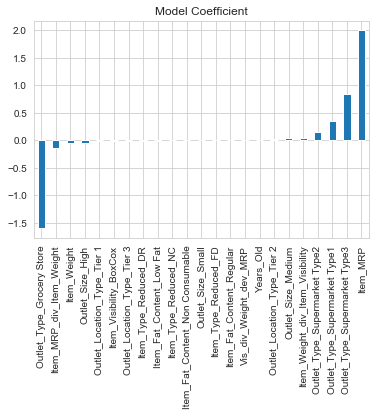

In [448]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error
#target = 'Item_Outlet_Sales_log'
#Id_Cols = ['Item_Identifier' , 'Outlet_Identifier']
filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo1.csv'
predictors = [x for x in df_train.columns if x not in [target]+Id_Cols]
predictors
#print prediction

algo = LinearRegression(normalize=True)

ModelFit(algo , df_train , df_test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.coef_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()

In [449]:
sub = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo1.csv')
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_log
0,FDW58,OUT049,7.280257
1,FDW14,OUT017,7.111929
2,NCN55,OUT010,6.384600
3,FDQ58,OUT017,7.657712
4,FDY38,OUT027,8.820443


In [450]:
sub['Item_Outlet_Sales_log'] = np.exp(sub['Item_Outlet_Sales_log']) 
sub.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales_log
0,FDW58,OUT049,1451.360336
1,FDW14,OUT017,1226.511450
2,NCN55,OUT010,592.647668
3,FDQ58,OUT017,2116.908021
4,FDY38,OUT027,6771.263276


In [452]:
sub.to_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo1.csv' , index = False)
print('file Created')

file Created



 Model Report
RMSE : 0.5403
CV Score : Mean - 0.8452 | Std - 0.01783 | Min - 0.8121 | Max - 0.8839


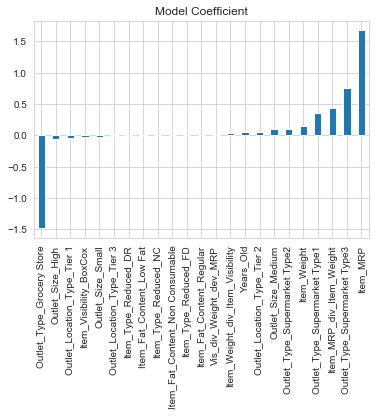

In [453]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.metrics import mean_squared_error

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo2.csv'
predictors = [x for x in df_train.columns if x not in [target]+Id_Cols]

algo = Ridge(alpha=0.05, normalize=True)

ModelFit(algo , df_train , df_test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.coef_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()


 Model Report
RMSE : 0.5128
CV Score : Mean - 0.8531 | Std - 0.01694 | Min - 0.8241 | Max - 0.8898


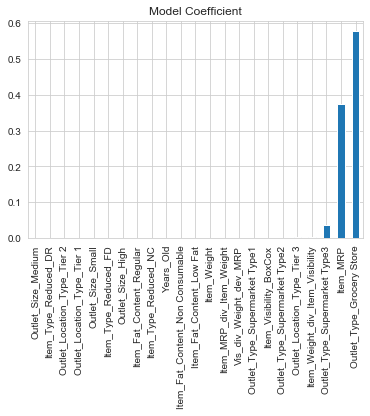

In [456]:
from sklearn.tree import DecisionTreeRegressor

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo3.csv'
predictors = [x for x in df_train.columns if x not in [target]+Id_Cols]

algo = DecisionTreeRegressor(max_depth=15 , min_samples_leaf=100)

ModelFit(algo , df_train , df_test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()


 Model Report
RMSE : 0.521
CV Score : Mean - 0.8499 | Std - 0.01729 | Min - 0.8207 | Max - 0.8844


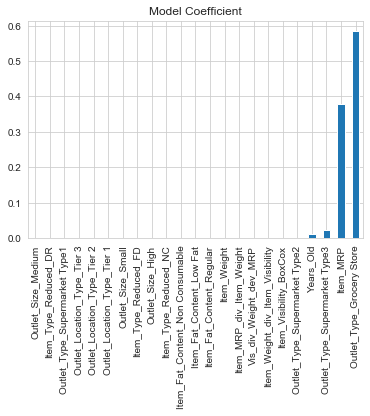

In [458]:
from sklearn.tree import DecisionTreeRegressor

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo4.csv'
predictors = [x for x in df_train.columns if x not in [target]+Id_Cols]

algo = DecisionTreeRegressor(max_depth=8 , min_samples_leaf=150)

ModelFit(algo , df_train , df_test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()


 Model Report
RMSE : 0.5221
CV Score : Mean - 0.8533 | Std - 0.0165 | Min - 0.824 | Max - 0.8882


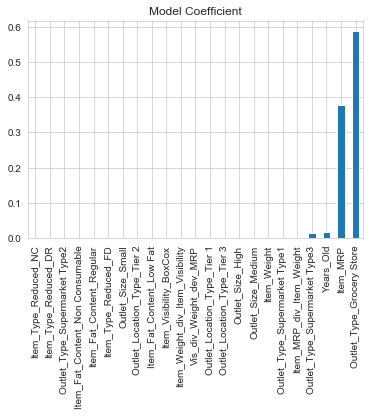

In [459]:
from sklearn.ensemble import RandomForestRegressor

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo5.csv'
predictors = [x for x in df_train.columns if x not in [target]+Id_Cols]

algo = RandomForestRegressor(n_estimators = 200 , max_depth=5 , min_samples_leaf=100 , n_jobs=4)

ModelFit(algo , df_train , df_test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()

In [460]:
sub = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo5.csv')
sub['Item_Outlet_Sales_log'] = np.exp(sub['Item_Outlet_Sales_log']) 
sub.columns = ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']
sub.to_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo5.csv' , index = False)
print('file Created')

file Created


In [463]:
x = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo5.csv')
x.max()

Item_Identifier        NCZ54
Outlet_Identifier     OUT049
Item_Outlet_Sales    5478.39
dtype: object


 Model Report
RMSE : 0.5189
CV Score : Mean - 0.854 | Std - 0.01639 | Min - 0.8251 | Max - 0.8889


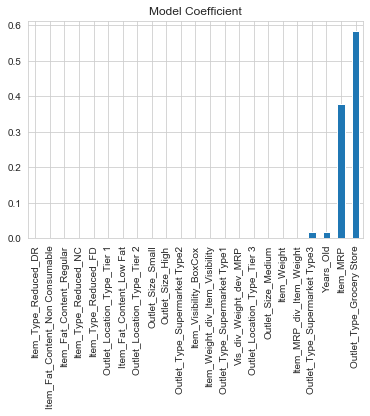

In [464]:
from sklearn.ensemble import RandomForestRegressor

filename = 'D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo6.csv'
predictors = [x for x in df_train.columns if x not in [target]+Id_Cols]

algo = RandomForestRegressor(n_estimators = 400 , max_depth=6 , min_samples_leaf=100 , n_jobs=4)

ModelFit(algo , df_train , df_test , predictors , target , Id_Cols , filename )

coef1 = pd.Series(algo.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar' , title = 'Model Coefficient')
plt.show()

In [465]:
sub = pd.read_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo6.csv')
sub['Item_Outlet_Sales_log'] = np.exp(sub['Item_Outlet_Sales_log']) 
sub.columns = ['Item_Identifier','Outlet_Identifier', 'Item_Outlet_Sales']
sub.to_csv('D:\\Ashish\\Projects\\Hackethon Problems\\BigMart_Regression_problem\\Algo6.csv' , index = False)
print('file Created')

file Created
